<a href="https://colab.research.google.com/github/maaniaxs/Deep-Learning/blob/main/Fake_News_Project_05_11_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# FAKE NEWS PROJECT

In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [3]:
 # Load Fake news dataset
fake = pd.read_csv('/content/drive/MyDrive/Fake News Project/Fake.csv')

# load the true news dataset
true = pd.read_csv('/content/drive/MyDrive/Fake News Project/True.csv')

In [4]:
print(fake.shape)
fake.head()

(23481, 4)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
# TRUE NEWS DATAFRAME
print(true.shape)
true.head()

(21417, 4)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
# SUBJECT CATEGORY OF FAKE_NEWS
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [7]:
# SUBJECT CATEGORY OF TRUE_NEWS
true['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [8]:
# we add a label feature
fake['label'] = 1   # fake_news label

true['label'] = 0   # true_news label

In [9]:
# we concatinated  these both dataframe
df = pd.concat([fake,true], axis=0)

# shuffled the dataframe
df = df.sample(frac=1,ignore_index=True, random_state=42)

print(df.shape)
df.tail()

(44898, 5)


,title,text,subject,date,label
44893,UNREAL! CBS’S TED KOPPEL Tells Sean Hannity He...,,politics,"Mar 27, 2017",1
44894,PM May seeks to ease Japan's Brexit fears duri...,LONDON/TOKYO (Reuters) - British Prime Ministe...,worldnews,"August 29, 2017",0
44895,Merkel: Difficult German coalition talks can r...,BERLIN (Reuters) - Chancellor Angela Merkel sa...,worldnews,"November 16, 2017",0
44896,Trump Stole An Idea From North Korean Propaga...,Jesus f*cking Christ our President* is a moron...,News,"July 14, 2017",1
44897,BREAKING: HILLARY CLINTON’S STATE DEPARTMENT G...,IF SHE S NOT TOAST NOW THEN WE RE IN BIGGER TR...,politics,"Apr 23, 2015",1


In [15]:
import nltk
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
lemmatize= WordNetLemmatizer()
import re
import  string
stop_word= stopwords.words('english')
punct = string.punctuation

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [14]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [16]:
# let's Make a function for cleaning the text data
def clean_data(news):

  text = news.lower()
  text= re.sub(r"n\'t", ' not', text)
  text= re.sub(r'https?:\S+|www.\S+','', text)   # remove hyperlink
  text= re.sub(r'\£+|\$+', ' dollars ', text)
  text=re.sub(r'\d{10,}', ' number ',text)
  text= re.sub(r"'", " ' ", text)
  text= re.sub(r'"', ' " ', text)  
  text= re.sub(r"\'ve", ' have', text)
  text= re.sub(r"\'m", ' am', text)
  text= re.sub(r"\'re", ' are', text)
  text= re.sub("\'s", 's', text)
    
  text= re.sub('[^A-Za-z]+',' ', text)
  text= re.sub("\s+",' ', text)    # removed extra whitespace character
  return text

In [17]:
##
from tqdm import tqdm
preprocess=[]
for var in tqdm(df['title'].values):
    sent= clean_data(var)
    sent= ' '.join(e for e in sent.split() if e not in stop_word) #
    sent= ' '.join(lemmatize.lemmatize(e) for e in sent.split()) #
    preprocess.append(sent.strip())

df['title'] = preprocess

100%|██████████| 44898/44898 [00:05<00:00, 8699.99it/s] 


In [18]:
#
from tqdm import tqdm
preproces=[]
for var in tqdm(df['text'].values):
    sent= clean_data(var)
    sent= ' '.join(e for e in sent.split() if e not in stop_word) #
    sent= ' '.join(lemmatize.lemmatize(e) for e in sent.split()) #
    preproces.append(sent.strip())

df['text'] = preproces

100%|██████████| 44898/44898 [01:27<00:00, 510.69it/s]


In [19]:
## These all rows have whitespace character so it is removed 
for i in range(0,len(df['text'])):
    if len(df['text'][i].split()) <= 1:
        df.drop(i, axis=0, inplace=True)
        
df.reset_index(drop=True, inplace=True) #
df.shape

(44164, 5)

In [20]:
df.head()

,title,text,subject,date,label
0,ben stein call th circuit court committed coup...,st century wire say ben stein reputable profes...,US_News,"February 13, 2017",1
1,trump drop steve bannon national security council,washington reuters u president donald trump re...,politicsNews,"April 5, 2017",0
2,puerto rico expects u lift jones act shipping ...,reuters puerto rico governor ricardo rossello ...,politicsNews,"September 27, 2017",0
3,oops trump accidentally confirmed leaked israe...,monday donald trump embarrassed country accide...,News,"May 22, 2017",1
4,donald trump head scotland reopen golf resort,glasgow scotland reuters u presidential candid...,politicsNews,"June 24, 2016",0


In [43]:
print('max words length =', max(df['text_length']))
print('average words length of all sentences =', np.mean(df['text_length']))

max words length = 4987
average words length of all sentences = 238.03138302689973


In [18]:
# add a feature of sentences words length 
length = [len(i.split()) for i in df['text']]
df['text_length'] = length

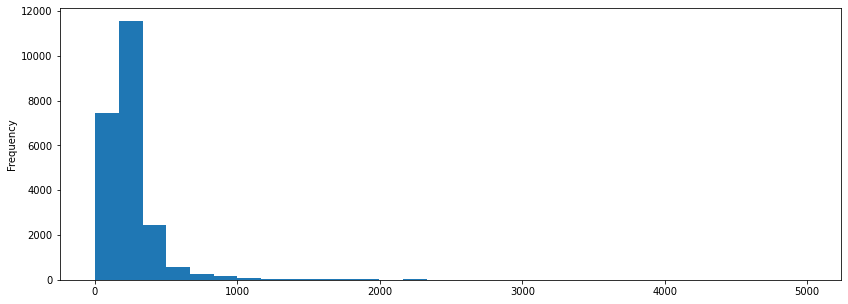

In [44]:
# Fake news words length distribution
df['text_length'][df['label']==1].plot.hist(bins=30, figsize=(14,5))

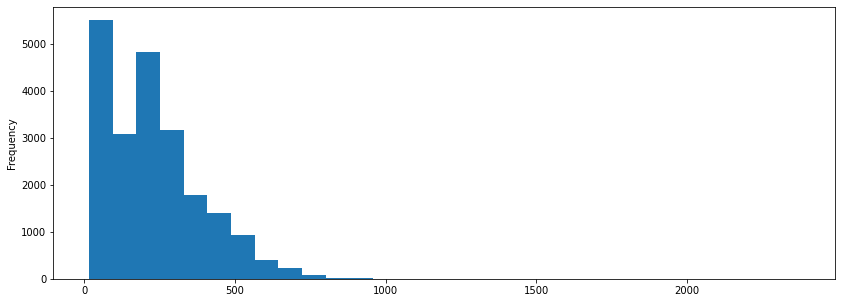

In [45]:
# True news words length distribution
df['text_length'][df['label']==0].plot.hist(bins=30, figsize=(14,5))

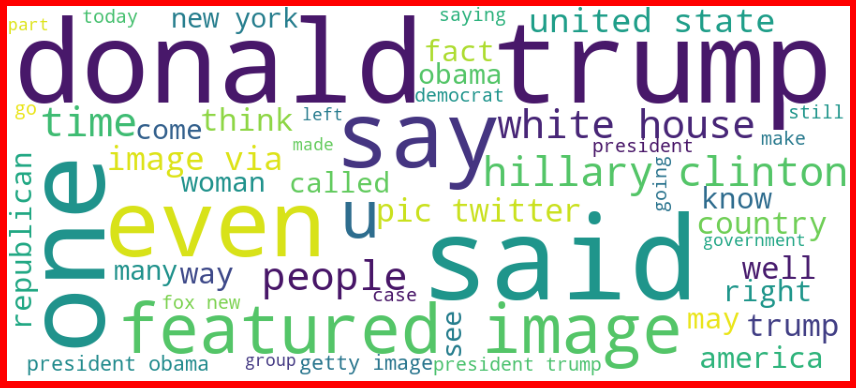

In [46]:
# GETTING SENSE OF CLOUD WORDS OF fake_news
from wordcloud import WordCloud

fake_news= df['text'][df['label']==1]
fake_news_cloud= WordCloud(width=900,height=400, background_color='white', max_words=50).generate(' '.join(fake_news))

plt.figure(figsize=(12,7), facecolor='r')
plt.imshow(fake_news_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()

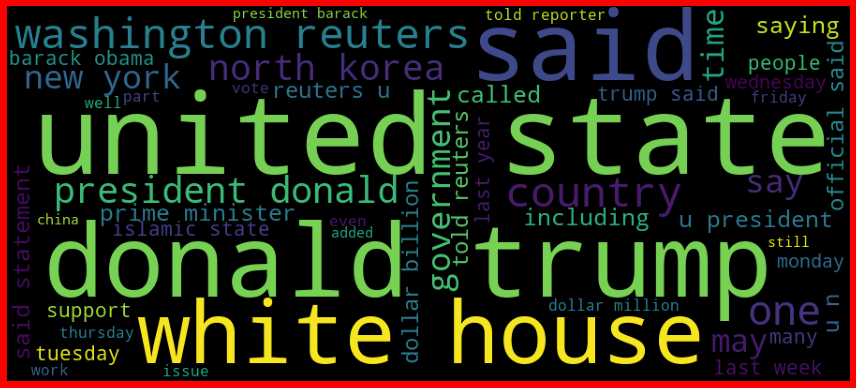

In [47]:
# GETTING SENSE OF CLOUD WORDS OF true_news
from wordcloud import WordCloud

true_news= df['text'][df['label']==0]
true_news_cloud= WordCloud(width=900,height=400, background_color='black', max_words=50).generate(' '.join(true_news))

plt.figure(figsize=(12,7), facecolor='r')
plt.imshow(true_news_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()


# Built a Model_0 with sklearn

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline


In [48]:
# split the dataframe into train & test 
xtrain, xtest, ytrain,ytest = train_test_split(df['text'], df['label'], test_size=0.20, random_state=42)

pipe = Pipeline([('tf_idf', TfidfVectorizer()),('rf_c', RandomForestClassifier())])

In [49]:
# RANDOMFOREST_CLASSIFER MODEL
pipe.fit(xtrain, ytrain)
pred = pipe.predict(xtest)

print('accuracy_score=', accuracy_score(ytest, pred))
print('precision_score=', precision_score(ytest, pred))
print('recall_score=', recall_score(ytest, pred))
print('f1_score=', f1_score(ytest, pred))
print('confusion matrix \n', confusion_matrix(ytest, pred))

accuracy_score= 0.9912826899128269
precision_score= 0.9918286219081273
recall_score= 0.9911719267269918
f1_score= 0.9915001655811899
confusion matrix 
 [[4265   37]
 [  40 4491]]


In [32]:
print(xtest[22216])
print(ytest[22216])

well take long short time since american kinda sorta elected donald trump pussygrabber chief trump appointed bona fide white nationalist high level position perform numerous action month ago considered extremely unlikely nightmare scenario latest seems muslim registry medium told u trump serious might actually happen trump regime muslim immigrant coming united state trump pal call terror prone country soon register check regularly government trump adviser kansa secretary state kris kobach way kobach say trump administration aim quickly waste taxpayer dollar wall moving forward proposal get thing rolling registry immigrant muslim country reuters report kansa secretary state kris kobach helped write tough immigration law arizona elsewhere said interview trump policy adviser also discussed drafting proposal consideration reinstate registry immigrant muslim country kobach medium report say key member trump transition team said participated regular conference call dozen trump immigration ad

In [50]:
pipe.predict(["well take long short time since american kinda sorta elected donald trump pussygrabber chief trump appointed bona fide white nationalist high level position perform numerous action month ago considered extremely unlikely nightmare scenario latest seems muslim registry medium told u trump serious might actually happen trump regime muslim immigrant coming united state trump pal call terror prone country soon register check regularly government trump adviser kansa secretary state kris kobach way kobach say trump administration aim quickly waste taxpayer dollar wall moving forward proposal get thing rolling registry immigrant muslim country reuters report kansa secretary state kris kobach helped write tough immigration law arizona elsewhere said interview trump policy adviser also discussed drafting proposal consideration reinstate registry immigrant muslim country kobach medium report say key member trump transition team said participated regular conference call dozen trump immigration adviser past two three month trump transition team respond request confirmation kobach role president elect committed following specific recommendation advisory group national security entry exit registration system designed part kovach bush administration ineffective program singled muslim manage convict single person anything related terrorism campaign trump suggested monitoring mosque added would need lot system extend beyond database keep eye muslim kobach say adviser also looking get construction border wall moving without approval congress say happen reappropriating existing fund acknowledges future fiscal year require additional appropriation trump shown u character chooses part administration action since elected say give chance see governs answer president elect pussygrabber repeatedly demonstrated completely lacking moral compassion decency hand size u oppose donald trump every turn protect progress america made last fifty year defend nation every way internal enemy recently john oliver reminded u allow live become normalized keep reminding normal oliver said klan backed misogynist internet troll going delivering next state union address normal truer word never spoken featured image via getty image matthew busc "])

array([1])

In [51]:
# MULTINOMIAL_NB MODEL
pipe_nb = Pipeline([('tf_idf', TfidfVectorizer()),('mnb', MultinomialNB())])

pipe_nb.fit(xtrain, ytrain)
pred2 = pipe_nb.predict(xtest)

print('accuracy_score=', accuracy_score(ytest, pred2))
print('precision_score=', precision_score(ytest, pred2))
print('recall_score=', recall_score(ytest, pred2))
print('f1_score=', f1_score(ytest, pred2))
print('confusion matrix \n', confusion_matrix(ytest, pred2))

accuracy_score= 0.9345635684365448
precision_score= 0.9348734873487349
recall_score= 0.9377620834252924
f1_score= 0.9363155575143234
confusion matrix 
 [[4006  296]
 [ 282 4249]]


# Model_1 with Tensorflow sequential api


In [63]:
##  TEXT VECTORIZATION  & ALSO  EMBEDDING LAYER
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
print(len(tokenizer.word_index)) # total unique words in vocab
print(tokenizer.document_count)  # show no. of rows or no. sentences 
sentences = tokenizer.texts_to_sequences(df['text'])  #generate sequences(each words in each sentence replaced by words index no.)

103030
44164


In [64]:
# sentences vector size are not equal
sentences[0]

[500,
 599,
 412,
 20,
 1676,
 2736,
 16866,
 1233,
 44944,
 356,
 11,
 1297,
 5927,
 3422,
 617,
 111,
 1501,
 39662,
 44945,
 41,
 56,
 4889,
 82,
 272,
 8123,
 8391,
 111,
 592,
 2225,
 2653,
 1842,
 5,
 1,
 243,
 153,
 700,
 2736,
 2074,
 8271,
 577,
 2111,
 52,
 40,
 4,
 1775,
 11047,
 243,
 2166,
 798,
 2736,
 307,
 151,
 272,
 3390,
 57,
 4615,
 1579,
 57,
 10958,
 230,
 195,
 1177,
 82,
 1019,
 5370,
 2492,
 1094,
 1335,
 50,
 2509,
 9249,
 1019,
 52,
 324,
 1698,
 81,
 153,
 245,
 312,
 885,
 332,
 21302,
 2653,
 1666,
 2229,
 243,
 153,
 337,
 1,
 36,
 500,
 599,
 412,
 1,
 2872,
 112,
 4633,
 1256,
 80,
 412,
 617]

In [73]:
# get equal vector size length of each sentences
from keras.utils import pad_sequences
sequences = pad_sequences(sentences, padding= 'pre', maxlen=350) # pre/post ,maxlen= each sentence length
#sequences[0:3]

In [74]:
# label = df['label'].to_numpy() # 

x_train,x_test, y_train,y_test = train_test_split(sequences, df['label'], test_size=0.20, random_state=42)

In [75]:
y_train.shape,  y_test.shape

((35331,), (8833,))

In [76]:
x_train[29]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,    40,    15,     1,    71,  3599,   339,
         984,  1628,   844,    33,   354,     2,   134,  1444,   166,
        1289,   196,   371,  4676,   445,  1927,   863,   958,    54,
           4,   266,    41,   222,   444,   155,    40,  2879,   579,
         455,     5,    18,     1,   738,  1306,  1609,    66,  3515,
         598,  3029,   473,   958,   408,  1111,  5940,    27,     4,
         499,   540,

In [21]:
# 1st =17 vocabulary size , 2nd = 10 vector size of each words in all sentences, 
# 3rd = 6 each sentence size but we put equal sentence size text data into Embedding layer
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [78]:
model_1 = Sequential()
model_1.add(layers.Embedding(len(tokenizer.word_index), 32,input_length = 350 ))
model_1.add(layers.LSTM(128))
model_1.add(layers.Dropout(0.20))
model_1.add(layers.Dense(1, activation='sigmoid'))

model_1.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'] )

model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 350, 32)           3296960   
                                                                 
 lstm_2 (LSTM)               (None, 128)               82432     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,379,521
Trainable params: 3,379,521
Non-trainable params: 0
_________________________________________________________________


In [79]:
## fINALLY TRAINED THE MODEL_1
model_1.fit(x_train, y_train, validation_data = (x_test, y_test),epochs=8, batch_size=48)

Epoch 1/8
737/737 [==============================] - 21s 26ms/step - loss: 0.1466 - accuracy: 0.9487 - val_loss: 0.0473 - val_accuracy: 0.9857
Epoch 2/8
737/737 [==============================] - 19s 26ms/step - loss: 0.0429 - accuracy: 0.9877 - val_loss: 0.0355 - val_accuracy: 0.9898
Epoch 3/8
737/737 [==============================] - 17s 24ms/step - loss: 0.0127 - accuracy: 0.9965 - val_loss: 0.0410 - val_accuracy: 0.9873
Epoch 4/8
737/737 [==============================] - 17s 23ms/step - loss: 0.0087 - accuracy: 0.9978 - val_loss: 0.0338 - val_accuracy: 0.9929
Epoch 5/8
737/737 [==============================] - 17s 23ms/step - loss: 0.0098 - accuracy: 0.9972 - val_loss: 0.0302 - val_accuracy: 0.9917
Epoch 6/8
737/737 [==============================] - 17s 23ms/step - loss: 0.0099 - accuracy: 0.9966 - val_loss: 0.0577 - val_accuracy: 0.9814
Epoch 7/8
737/737 [==============================] - 17s 23ms/step - loss: 0.0082 - accuracy: 0.9982 - val_loss: 0.0423 - val_accuracy: 0.9891

In [80]:
## PERFORMANCE METRICS & ACCURACY
y_pred = model_1.predict(x_test)

y_pred = np.where(y_pred > 0.5, 1, 0)

print('accuracy_score=', accuracy_score(y_test, y_pred))
print('precision_score=', precision_score(y_test, y_pred))
print('recall_score=', recall_score(y_test, y_pred))
print('f1_score=', f1_score(y_test, y_pred))

print('confusion_matrix \n', confusion_matrix(y_test, y_pred))

277/277 [==============================] - 4s 13ms/step
accuracy_score= 0.9920751726480245
precision_score= 0.9920582395764395
recall_score= 0.9924961377179431
f1_score= 0.9922771403353927
confusion_matrix 
 [[4266   36]
 [  34 4497]]


# let's Build a Model_2 by using TensorFlow functional api with multiple inputs 

In [47]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
# 
max_length= 20  # max length OF SENTENCE will be

text_vectorizer1 = TextVectorization(max_tokens= None,
                                 #output_mode='int',
                                output_sequence_length= max_length)  # each sentence have length 35

text_vectorizer1.adapt(df['title'])
vocab_word = text_vectorizer1.get_vocabulary() # get all the unique words from our training data
print(len(vocab_word))
embedding1 = layers.Embedding(len(vocab_word), output_dim=24, input_length= 20)  # EMBEDDING LAYER

17549


In [52]:
# 
text_vectorizer2 = TextVectorization(max_tokens= None,
                                output_sequence_length= 250)

text_vectorizer2.adapt(df['text'])
vocab_word = text_vectorizer2.get_vocabulary() # get all the unique words from our training data
print(len(vocab_word))

embedding2 = layers.Embedding(len(vocab_word), output_dim=24, input_length= 250)  # EMBEDDING LAYER

103032


In [24]:
df['text'].shape

(44164,)

In [40]:
df1 = df.sample(8000, random_state=42)
df2 = df.drop(df1.index, axis=0).sample(1500, random_state=42)

df3 = df.drop(df1.index, axis=0)
df3 = df3.drop(df2.index, axis=0) 

x_train1 = df3['title']
x_train2 = df3['text']
y_train = df3['label']

x_test1 = df1['title']
x_test2 = df1['text']
y_test = df1['label']

val_1 = df2['title']
val_2 = df2['text']
val_label = df2['label']



In [41]:
print('validation data shape = ',df2.shape)
print('test data shape = ',df1.shape)
print('train data shape = ',df3.shape)

validation data shape =  (1500, 5)
test data shape =  (8000, 5)
train data shape =  (34664, 5)


In [42]:
1500+8000+34664

44164

In [67]:
input = layers.Input(shape= (1,), dtype= 'string', name='model1')
x = text_vectorizer1(input)
x = embedding1(x)
x = layers.LSTM(120, return_sequences=True)(x)   
x = layers.Dropout(0.2)(x)
y = layers.GlobalMaxPooling1D()(x)
#output = layers.Dense(1, activation= 'sigmoid')(x)  
#model_2 = tf.keras.Model(inputs = input, outputs=output, name='model_2')

input2 = layers.Input(shape= (1,), dtype='string', name='model2')
x2 = text_vectorizer2(input2)
x2 = embedding2(x2)
y2 = layers.LSTM(72)(x2)
#output2 = layers.Dense(1, activation='sigmoid')

concate = layers.concatenate([y, y2])   # adding the last layers of 2 model

z = layers.Dense(64, activation='relu')(concate)
z = layers.Dropout(0.2)(z)
model_output = layers.Dense(1, 'sigmoid')(z)
model_2 = tf.keras.Model(inputs = [input, input2], outputs = model_output, name='model_2')

In [71]:
# compile model_2
model_2.compile(loss='binary_crossentropy', optimizer = 'adam', metrics= ['accuracy'])

model_2.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 model1 (InputLayer)            [(None, 1)]          0           []                               
                                                                                                  
 text_vectorization_3 (TextVect  (None, 20)          0           ['model1[0][0]']                 
 orization)                                                                                       
                                                                                                  
 embedding_3 (Embedding)        (None, 20, 24)       421176      ['text_vectorization_3[4][0]']   
                                                                                                  
 model2 (InputLayer)            [(None, 1)]          0           []                         

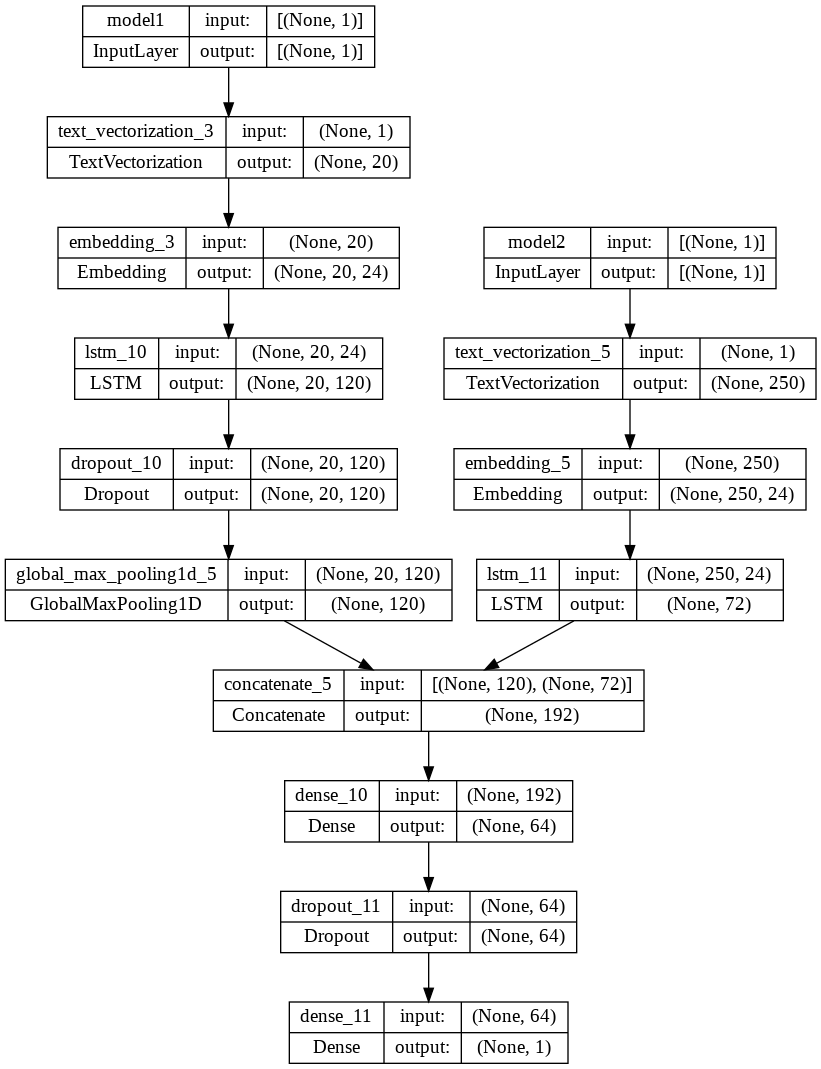

In [72]:
from keras.utils import plot_model
plot_model(model_2, show_shapes= True)

In [69]:
history = model_2.fit(x=[x_train1,x_train2], y=y_train, epochs=6, validation_data=([x_test1,x_test2], y_test), verbose=1, batch_size=64) 

Epoch 1/6
542/542 [==============================] - 16s 22ms/step - loss: 0.0231 - accuracy: 0.9949 - val_loss: 0.1139 - val_accuracy: 0.9718
Epoch 2/6
542/542 [==============================] - 11s 20ms/step - loss: 9.1583e-04 - accuracy: 0.9997 - val_loss: 0.2820 - val_accuracy: 0.9498
Epoch 3/6
542/542 [==============================] - 11s 20ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.2761 - val_accuracy: 0.9540
Epoch 4/6
542/542 [==============================] - 11s 20ms/step - loss: 5.0919e-04 - accuracy: 0.9998 - val_loss: 0.2479 - val_accuracy: 0.9578
Epoch 5/6
542/542 [==============================] - 11s 20ms/step - loss: 2.2424e-05 - accuracy: 1.0000 - val_loss: 0.2320 - val_accuracy: 0.9616
Epoch 6/6
542/542 [==============================] - 11s 20ms/step - loss: 6.4034e-06 - accuracy: 1.0000 - val_loss: 0.2502 - val_accuracy: 0.9606


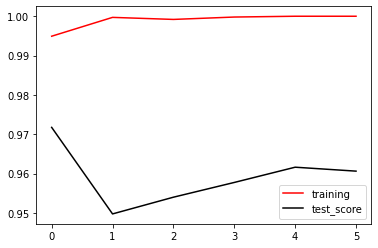

In [70]:
##
plt.plot(history.history['accuracy'], color= 'red', label= 'training')
plt.plot(history.history['val_accuracy'], color= 'k', label= 'test_score')
plt.legend()
plt.show()

In [73]:
pred = model_2.predict((x_test1,x_test2))

250/250 [==============================] - 3s 8ms/step


In [76]:
## PERFORMANCE METRICS & ACCURACY
from sklearn.metrics import *
pred = np.where(pred > 0.5, 1, 0)

print('accuracy_score=', accuracy_score(y_test, pred))
print('precision_score=', precision_score(y_test, pred))
print('recall_score=', recall_score(y_test, pred))
print('f1_score=', f1_score(y_test, pred))

accuracy_score= 0.960625
precision_score= 0.9571428571428572
recall_score= 0.9662674162796382
f1_score= 0.9616834934922759


In [77]:
## PERFORMANCE METRICS & ACCURACY
y_pred = model_2.predict((val_1, val_2))

y_pred = np.where(y_pred > 0.5, 1, 0)

print('accuracy_score=', accuracy_score(val_label, y_pred))
print('precision_score=', precision_score(val_label, y_pred))

print('recall_score=', recall_score(val_label, y_pred))
print('f1_score=', f1_score(val_label, y_pred))

# we got 95 percent accuracy on validation data

47/47 [==============================] - 1s 9ms/step
accuracy_score= 0.952
precision_score= 0.9419191919191919
recall_score= 0.966321243523316
f1_score= 0.9539641943734015


In [78]:
## Save This Functional model

model_2.save('/content/drive/MyDrive/Colab Notebooks/fake_news_model_2')

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/fake_news_model_2')
